In [25]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
#from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

In [26]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
#boston_dataset = load_boston()
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset
boston_dataset = fetch_openml(name="boston", version=1, as_frame=True)

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

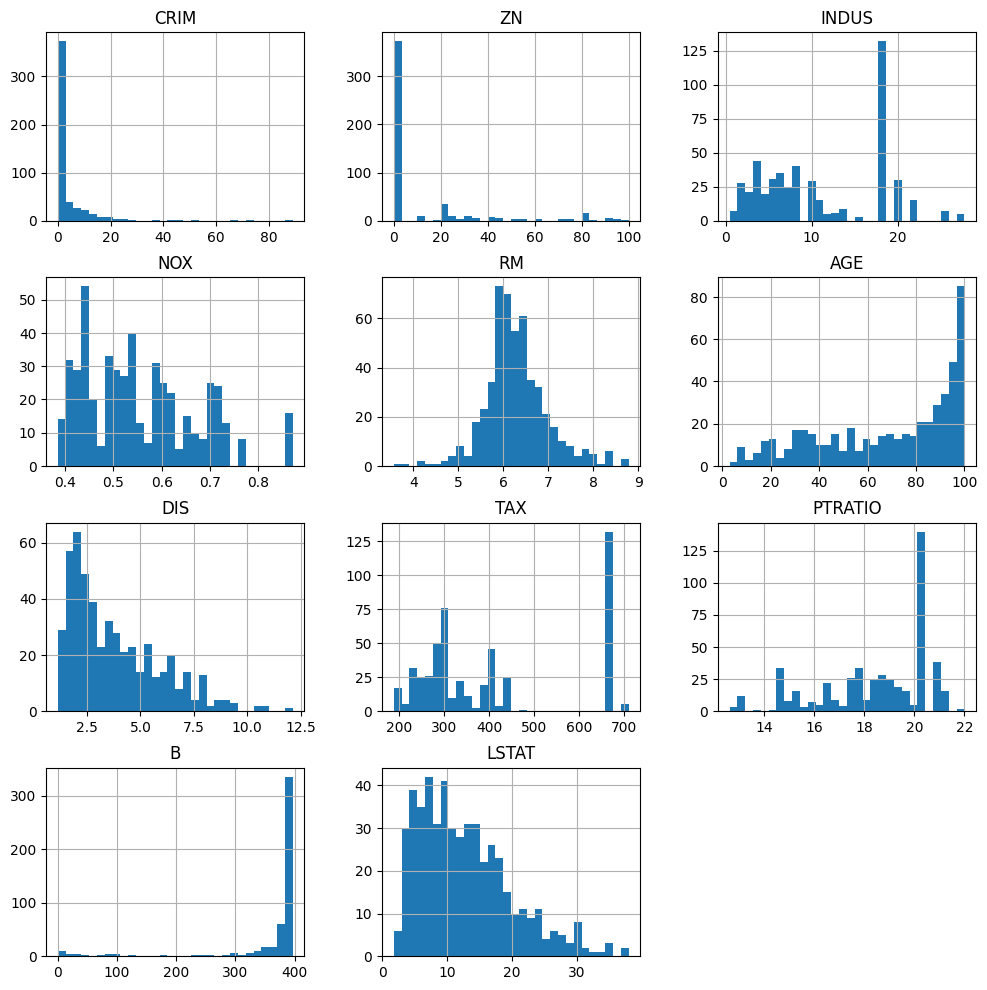

In [27]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [28]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# (not included in this recipe, but present in recipe 1)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

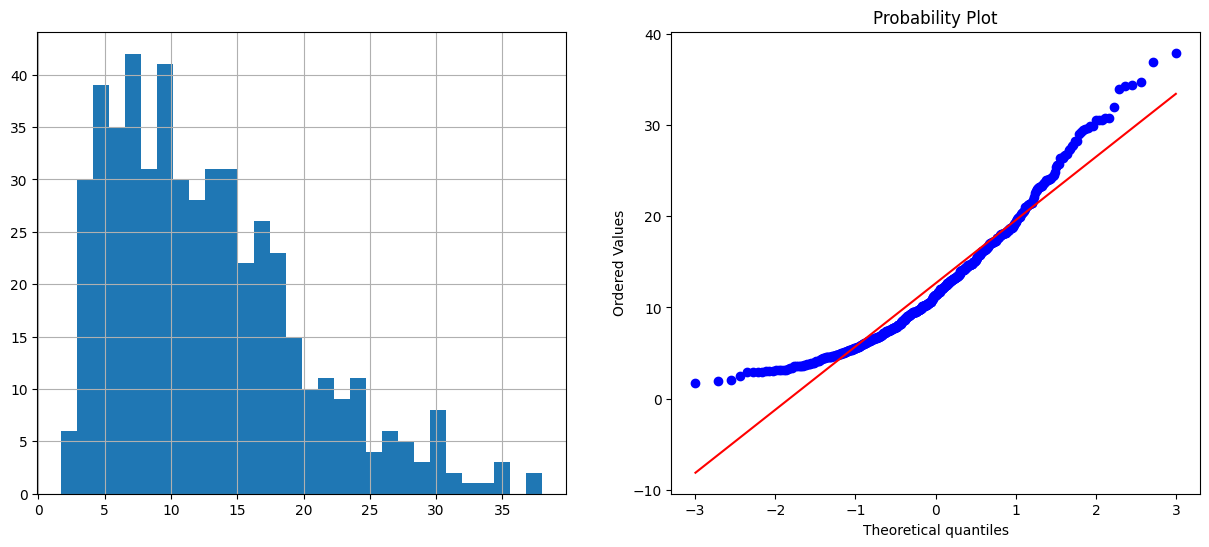

In [29]:
# check original distribution (not in book chapter)

diagnostic_plots(data, 'LSTAT')

 ## Box-Cox transformation with SciPy

In [30]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

Optimal λ:  0.22776736893884023


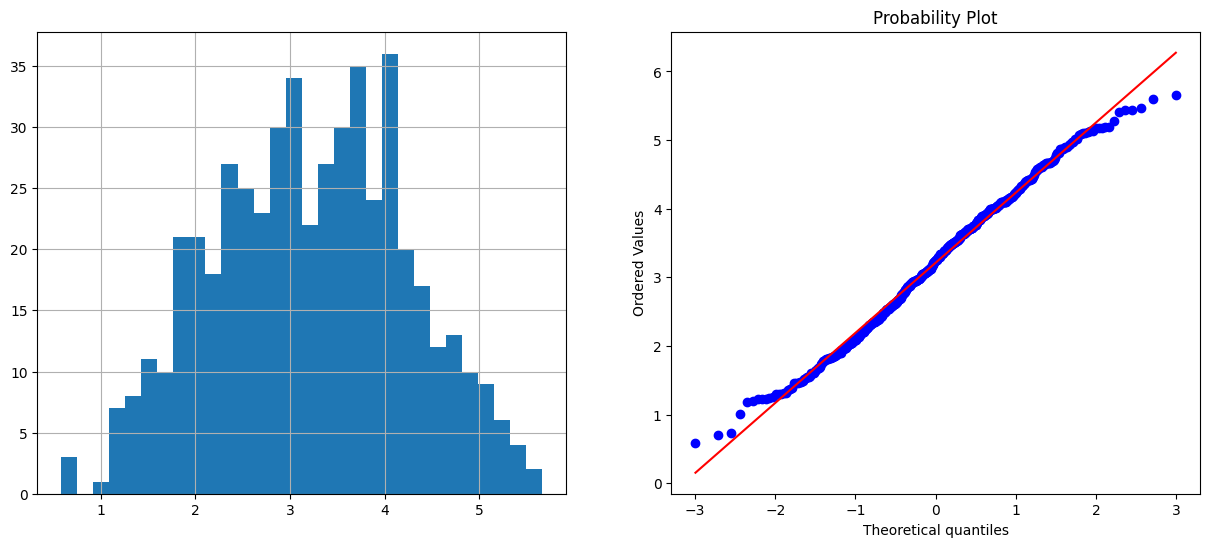

In [31]:
# apply the Box-Cox transformation to variable LSTAT

# λ is the transformation parameter, estimated from the data.

# The goal: reduce skewness and stabilize variance.

# Works only with strictly positive values.
data_tf['LSTAT'], param = stats.boxcox(data['LSTAT']) 

# print the optimal lambda found for LSTAT
print('Optimal λ: ', param)

# visualize the transformed variable (not in book chapter)
diagnostic_plots(data_tf, 'LSTAT')

 ## Box-Cox transformation with Scikit-learn

In [32]:
# initialize the transformer with box-cox
transformer = PowerTransformer(method='box-cox', standardize=False)

In [33]:
# make list with columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

In [34]:
# fit transformer to slice of dataframe with indicated variables
# transformer will learn the lambdas
transformer.fit(data[cols])

PowerTransformer(method='box-cox', standardize=False)

In [35]:
# lambdas are stored in a transformer attribute (not in book)
transformer.lambdas_

array([ 0.22776737, -0.91561209, -0.15560583,  0.44895979])

In [36]:
# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

In [37]:
# transform NumPy array to pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

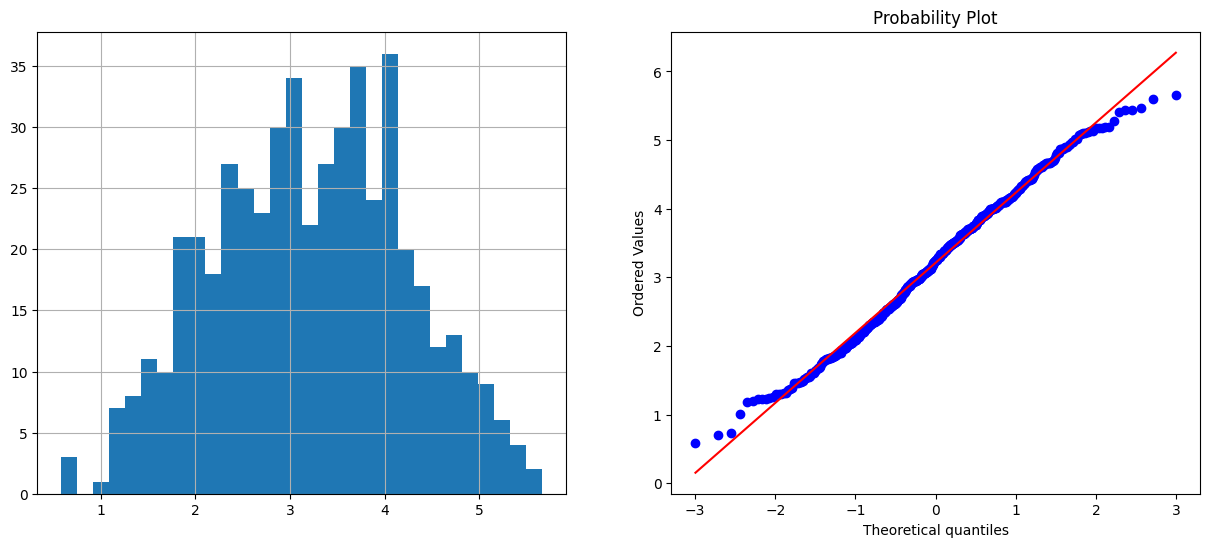

In [38]:
# visualize transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

 ## Box-Cox transformation with Feature-engine

In [39]:
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the data set
bct.fit(data)

BoxCoxTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [40]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_tf = bct.transform(data)

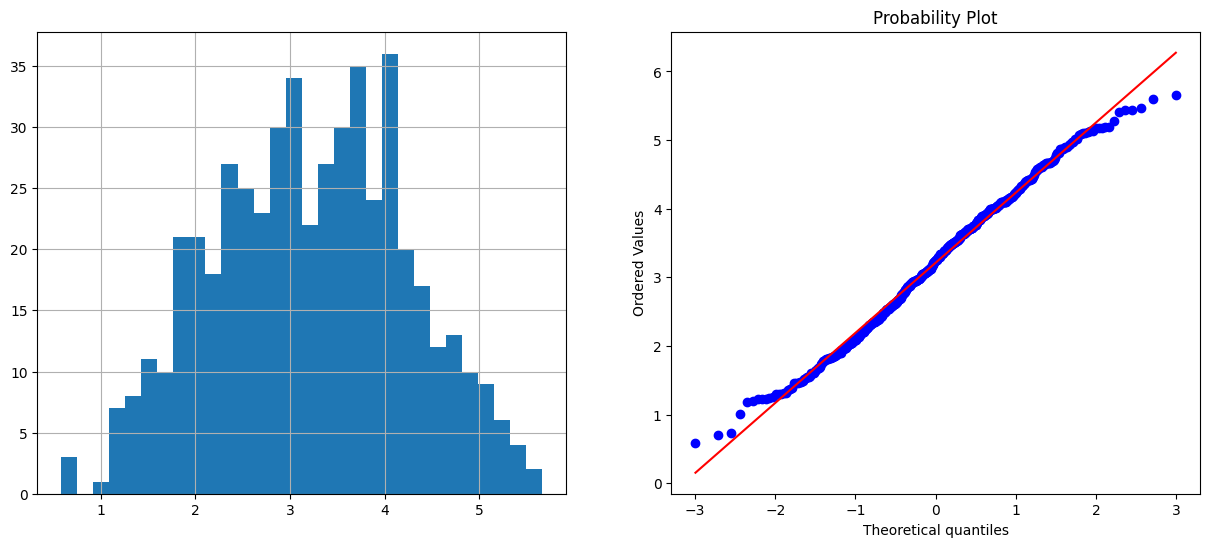

In [41]:
# visualize the distribution (not in book)
diagnostic_plots(data_tf, 'LSTAT')

In [42]:
# the transformer stores the optimal parameter for each 
# variable in a dictionary in its attribute lambda_dict_

bct.lambda_dict_

{'LSTAT': 0.22776736893884023,
 'NOX': -0.9156120907279849,
 'DIS': -0.15560583167193484,
 'RM': 0.4489597919730037}